In [71]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [72]:
speedup_factor = 5
with open('simlog.json', 'r') as f:
    sim = json.load(f)
with open('maestronetlist.json', 'r') as f:
    netlist = json.load(f)['tasks']

In [9]:
target_order = [n['id'] for n in netlist]
target_timings = [n['start'] for n in netlist]
sim_order = list(sim.keys())
sim_timings = [v*speedup_factor for v in sim.values()]

TypeError: unsupported operand type(s) for *: 'dict' and 'float'

In [21]:
np.unique([
    t['task'] for t in netlist
])

array(['anneal', 'characterization_to_storage', 'characterize',
       'cooldown', 'hotplate_to_storage', 'spincoat',
       'spincoater_to_hotplate', 'storage_to_characterization',
       'storage_to_spincoater'], dtype='<U27')

In [19]:
def plot_task_types(sim):
    key = {
        'heat/cool':['anneal', 'cooldown'],
        'spincoat':['spincoat'],
        'characterize':['characterize'],
        'transfer':[
            'characterization_to_storage',
            'storage_to_characterization',
            'spincoater_to_hotplate',
            'storage_to_spincoater',
            'hotplate_to_storage',
        ]
    }
    colors = {k:plt.cm.Set2(i) for i,k in enumerate(key)}
    yvals = {k:i for i,k in enumerate(key)}

    for task, time in sim.items():
        for k,v in key.items():
            if task.split('-')[0] in v:
                plt.scatter(time*speedup_factor, yvals[k], color=colors[k])
                break
    plt.yticks(range(len(key)), key.keys())



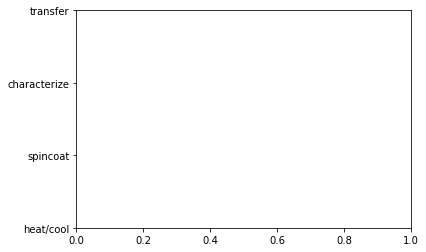

In [20]:
plot_task_types(sim)

In [18]:
# fig, ax = plt.
plt.scatter(sim_timings, target_timings)
plt.plot(plt.xlim(), plt.xlim(), 'k--')

NameError: name 'sim_timings' is not defined

In [14]:
sim_order == target_order

True

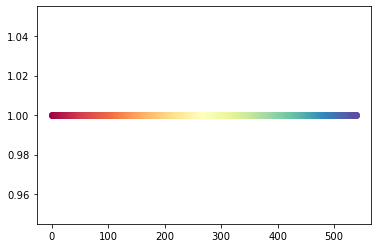

In [6]:
for i, t in enumerate(sim):
    color = plt.cm.Spectral(target_order.index(t)/len(target_order))
    plt.scatter(i, 1, c=[color])

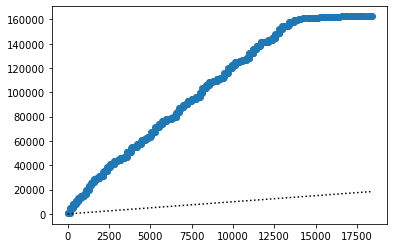

In [66]:
plt.scatter(goal_starts, actual_starts, alpha=)
plt.plot([min(goal_starts), max(goal_starts)], [min(goal_starts), max(goal_starts)], 'k:')

Plot simulated process order

In [49]:
worker_tasks = {
    'gripper_gantry': [
        'storage_to_spincoater',
        'spincoater_to_hotplate',
        'hotplate_to_storage',
        'storage_to_characterization',
        'characterization_to_storage',
    ],
    'spincoater_liquidhandler': [
        'storage_to_spincoater',
        'spincoater_to_hotplate',
        'spincoat',
    ],
    'hotplate': [
        'anneal',
    ],
    'storage': [
        'cooldown',
    ],
    'characterization': [
        'characterize',
        'storage_to_characterization',
        'characterization_to_storage',
    ]
}

In [69]:
def plot_solution(sim, ax=None):
    plt.figure(figsize=(14, 5))
    for idx, (sample, data) in enumerate(sim.items()):
        color = plt.cm.tab20(idx % 20)
        offset = np.random.random() * 0.5 - 0.25
        for t in data['tasks']:
            for i, (w, tl) in enumerate(worker_tasks.items()):
                found = False
                if t['task'] in tl:
                    y = [i + offset] * 2

                    st = t['start_actual']*speedup_factor / 60
                    ft = t['finish_actual']*speedup_factor / 60
                    if t['task'] == 'characterize':
                        print(speedup_factor *(ft-st))

                    # minval = 1
                    # if ft-st < minval:
                    #     ft = st+minval
                    x = [st,ft]
                    plt.plot(x, y, color=color)
                    found = True
                    break
            if not found:
                print(t['task'])

    plt.yticks(range(len(worker_tasks)), labels=worker_tasks.keys())
    plt.xlabel("Time (minutes)")

1.2547322114308646
1.2557071447372437
1.2550912300745631
1.2545213103294373
1.254845360914869
1.2547358870506287
1.254688004652662
1.2546929717063904
1.2542334198951721
1.254640817642212
1.253839631875362
1.2537141640981009
1.2554916739463806
1.2538122137387564
1.2540804346402545
1.2545475363731384
1.2534721692403128
1.2542208035786917
1.2535662452379803
1.2529570857683758
1.2546730041503906
1.254202922185268
1.2549187739690026
1.2543466687202454
1.2532641490300556
1.252346932888031
1.252912978331242
1.2544349829355994
1.2518099943796734
1.2517903248468976
1.2517438332239728
1.2515521049499512
1.2509266535441022
1.2527105212211609
1.2543546160062147
1.2530129154523273
1.2526273727416992
1.252584159374237
1.2526625394821167
1.2525626023610492
1.252465049425755
1.2524741888046265
1.252402166525517
1.2506124377250671
1.252505381902047
1.253270010153451
1.252345045407619
1.2522766987482647
1.2522570292155066
1.2522532542546472
1.2523608406384668
1.2522579232851605
1.2522502740224262
1.2522

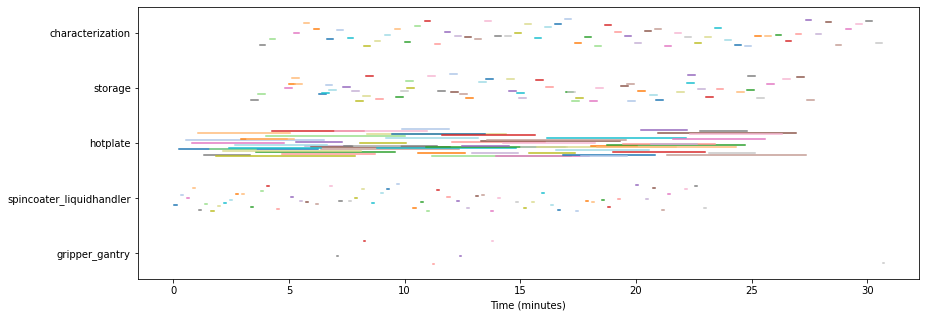

In [73]:
plot_solution(sim)
# plt.xlim(0,50)